In [31]:
from PyPESTO.FRP import create_FRP2_v1
from PyPESTO.FRP.petab import plot_measurements
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# sbml_model_filepath = '/SBML/PyPESTO/FRP/sbml_model.xml'
amici_model, sbml_model_filepath = create_FRP2_v1.load_amici_from_sbml()

Creating SBML model (FRP2 v1)
Creating species.
Generating parameters.
Creating reactions
Importing AMICI model from SBML


2024-09-03 06:09:09.012 - amici.sbml_import - DEBUG - Finished validating SBML                     + (4.93E-02s)
2024-09-03 06:09:09.051 - amici.sbml_import - DEBUG - Finished converting SBML local parameters    + (3.02E-03s)
2024-09-03 06:09:09.061 - amici.sbml_import - INFO - Finished loading SBML                           (1.18E-01s)
2024-09-03 06:09:09.092 - amici.sbml_import - DEBUG - Finished processing SBML annotations         + (4.31E-03s)
2024-09-03 06:09:09.172 - amici.sbml_import - DEBUG - Finished gathering local SBML symbols        + (4.99E-02s)
2024-09-03 06:09:09.209 - amici.sbml_import - DEBUG - Finished processing SBML parameters          + (1.51E-02s)
2024-09-03 06:09:09.221 - amici.sbml_import - DEBUG - Finished processing SBML compartments        + (4.95E-04s)
2024-09-03 06:09:09.267 - amici.sbml_import - DEBUG - Finished processing SBML species initials   ++ (9.02E-03s)
2024-09-03 06:09:09.278 - amici.sbml_import - DEBUG - Finished processing SBML rate rules       

running build_ext
------------------------------ model_ext ------------------------------
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending flags from AMICI_LDFLAGS: -fopenmp
-- SuiteSparse_config version: 7.6.0
-- SuiteSparse_config include: /usr/local/lib/python3.10/dist-packages/amici/include/suitesparse
-- SuiteSparse_config library: /usr/local/lib/python3.10/dist-packages/amici/lib/libsuitesparseconfig.a
-- SuiteSparse_config static:  /usr/local/lib/python3.10/dist-packages/amici/lib/libsuitesparseconfig.a
-- AMD version: 3.3.1
-- AMD include: /usr/local/lib/python3.10/dist-packages/amici/include/suitesparse
-- AMD library: /usr/lo

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: title={'center': 'Condition c_0'}, xlabel='time (s)', ylabel='Simulated Concentration (M)'>,
        <Axes: title={'center': 'Condition c_1'}, xlabel='time (s)', ylabel='Simulated Concentration (M)'>,
        <Axes: title={'center': 'Condition c_2'}, xlabel='time (s)', ylabel='Simulated Concentration (M)'>],
       dtype=object))

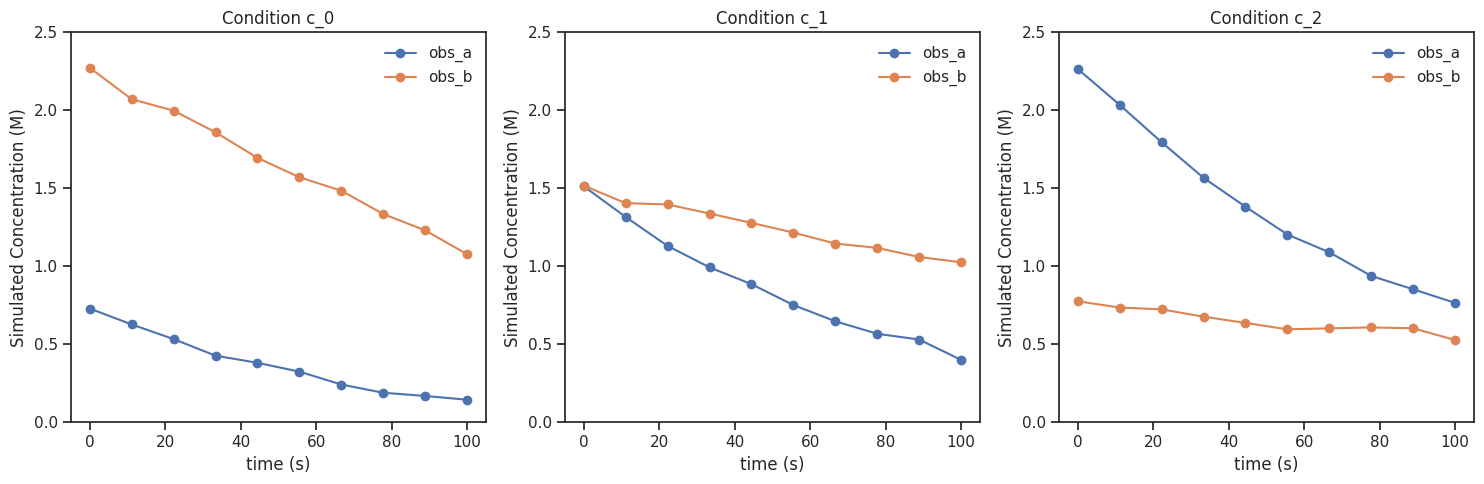

In [43]:
observables_df, conditions_df, measurements_df = create_FRP2_v1.define_FRP_measurements(amici_model)

plot_measurements(measurements_df)

In [44]:
kpAA, rA, rB, rX = create_FRP2_v1.get_ratios_from_rate_params(kpAA=1.0, kpAB=1.0, kpBA=1.0, kpBB=1.0)
print(kpAA, rA, rB, rX)

kpAA, kpAB, kpBA, kpBB = create_FRP2_v1.get_rate_params_from_ratios(kpAA=kpAA, rA=rA, rB=rB, rX=rX)
print(kpAA, kpAB, kpBA, kpBB)

1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0


In [45]:
kpAA_true = create_FRP2_v1.kpAA_true = 4.0
kpAB_true = create_FRP2_v1.kpAB_true = 0.2
kpBA_true = create_FRP2_v1.kpBA_true = 15.0
kpBB_true = create_FRP2_v1.kpBB_true = 2.0

# kpAA_true = create_FRP2_v1.kpAA_true = 1.0
# kpAB_true = create_FRP2_v1.kpAB_true = 1.0
# kpBA_true = create_FRP2_v1.kpBA_true = 1.0
# kpBB_true = create_FRP2_v1.kpBB_true = 1.0

rA_true = create_FRP2_v1.rA_true = create_FRP2_v1.kpAA_true / create_FRP2_v1.kpAB_true
rB_true = create_FRP2_v1.rB_true = create_FRP2_v1.kpBB_true / create_FRP2_v1.kpBA_true
rX_true = create_FRP2_v1.rX_true = create_FRP2_v1.kpAA_true / create_FRP2_v1.kpBB_true

yaml_filepath = create_FRP2_v1.write_petab_files(amici_model, sbml_model_filepath)

Visualization table not available. Skipping.


In [46]:
create_FRP2_v1

<module 'PyPESTO.FRP.create_FRP2_v1' from '/SBML/PyPESTO/FRP/create_FRP2_v1.py'>

In [47]:
import logging

import numpy as np
import petab
import amici
import amici.plotting
import sys
import os
import importlib

import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize
import tempfile

# log diagnostics
logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

# import to petab
petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
# importer = pypesto.petab.PetabImporter(petab_problem, model_name=create_FRP_v1.MODEL_NAME)

importer = pypesto.petab.PetabImporter.from_yaml(
    yaml_filepath,
    model_name=create_FRP2_v1.MODEL_NAME,
)

# Works when it runs twice for some reason
try:
    problem = importer.create_problem(force_compile=True)
except:
    problem = importer.create_problem(force_compile=True)

Visualization table not available. Skipping.
Compiling amici model to folder /SBML/amici_models/0.26.1/FRP2_v1.
Compiling amici model to folder /SBML/amici_models/0.26.1/FRP2_v1.
2024-09-03 06:17:05.381 - amici.petab.sbml_import - INFO - Importing model ...
2024-09-03 06:17:05.385 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.
2024-09-03 06:17:05.479 - amici.petab.sbml_import - INFO - Model name is 'FRP2_v1'.
Writing model code to '/SBML/amici_models/0.26.1/FRP2_v1'.
2024-09-03 06:17:05.481 - amici.petab.sbml_import - INFO - Species: 10
2024-09-03 06:17:05.482 - amici.petab.sbml_import - INFO - Global parameters: 9
2024-09-03 06:17:05.485 - amici.petab.sbml_import - INFO - Reactions: 15
2024-09-03 06:17:05.528 - amici.sbml_import - DEBUG - Finished validating SBML                    ++ (7.63E-04s)
2024-09-03 06:17:05.545 - amici.sbml_import - DEBUG - Finished converting SBML local parameters   ++ (9.80E-04s)
2024-09-03 06:17

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

In [48]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), n_chains=3,
)

Initializing betas with "near-exponential decay".


In [49]:
%%capture
n_samples = 10_000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    x0=np.array([
        np.log(1/rA_true), 
        np.log(1/rB_true), 
        np.log(1/rX_true), 
        np.log(1/kpAA_true)]),
    filename=None,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

Elapsed time: 55.68961546299997


In [8]:
# create_FRP2_v1.save_pypesto_results(result, "test.hdf5")

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


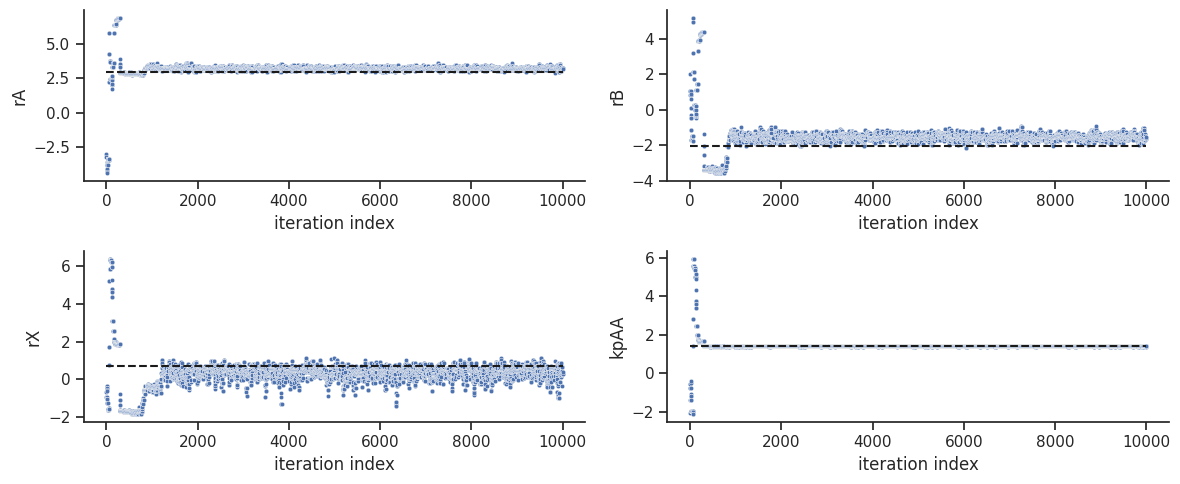

In [50]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5)
)

ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")


Geweke burn-in index: 1500
Geweke burn-in index: 1500
Geweke burn-in index: 1500
Geweke burn-in index: 1500


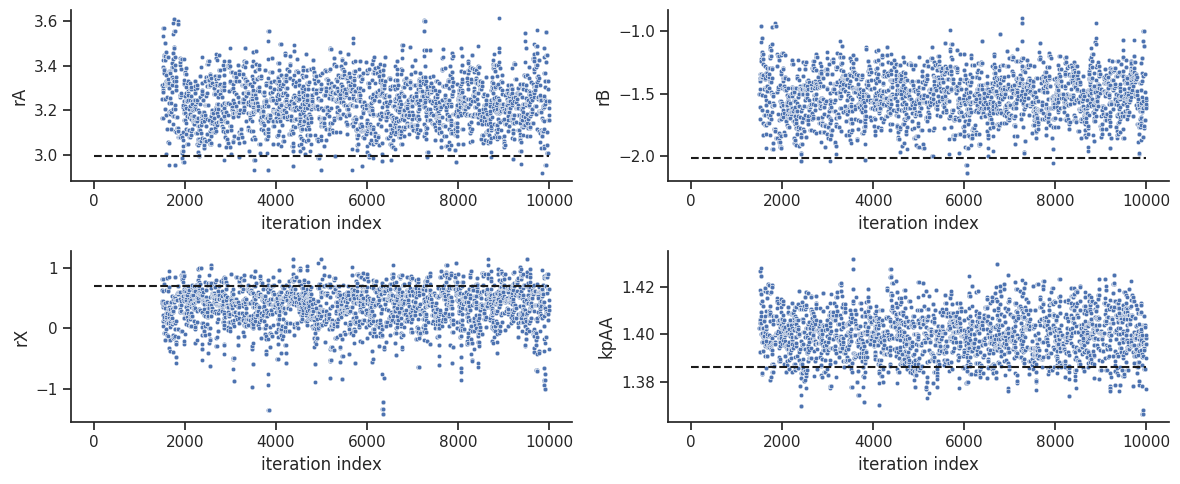

In [51]:
sample.geweke_test(result=result)
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5)
)
ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")

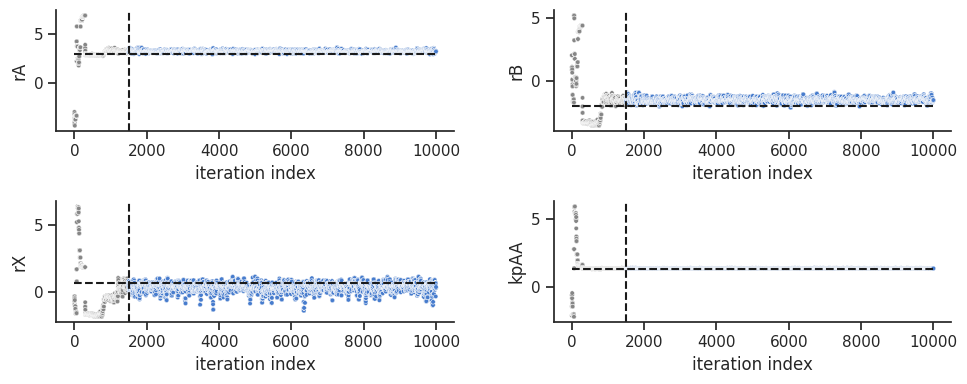

In [54]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, full_trace=True, size=(10, 4)
)
ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")

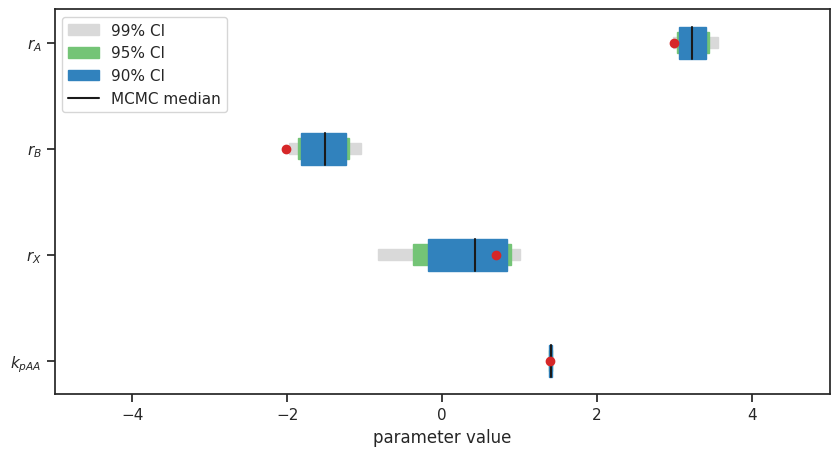

In [55]:
alpha = [99, 95, 90]
import matplotlib.pyplot as plt
ax = visualize.sampling_parameter_cis(result, alpha=alpha, size=(10, 5))
line1, = ax.plot([np.log(rA_true)], 0, 'o', color='tab:red')
line2, = ax.plot([np.log(rB_true)], 1, 'o', color='tab:red')
line3, = ax.plot([np.log(rX_true)], 2, 'o', color='tab:red')
line4, = ax.plot([np.log(kpAA_true)], 3, 'o', color='tab:red')

# Get existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

unique_handles_labels = list(dict(zip(labels, handles)).items())
unique_labels, unique_handles = zip(*unique_handles_labels)

# Update the legend with unique handles and labels
ax.legend(unique_handles, unique_labels)
ax.set_yticks([0,1,2,3],['$r_{A}$', '$r_{B}$', '$r_{X}$', '$k_{pAA}$'])
ax.set_xlabel('parameter value')
ax.set_ylabel('')
ax.set_xlim([-5, 5])
plt.show()

In [13]:
ci_level = 0.95
np.exp(sample.calculate_ci_mcmc_sample(result, ci_level=ci_level))

array([[17.38611043,  0.09289263,  0.8032211 ,  3.91831408],
       [24.56848555,  0.19111692,  3.08635205,  4.0755459 ]])

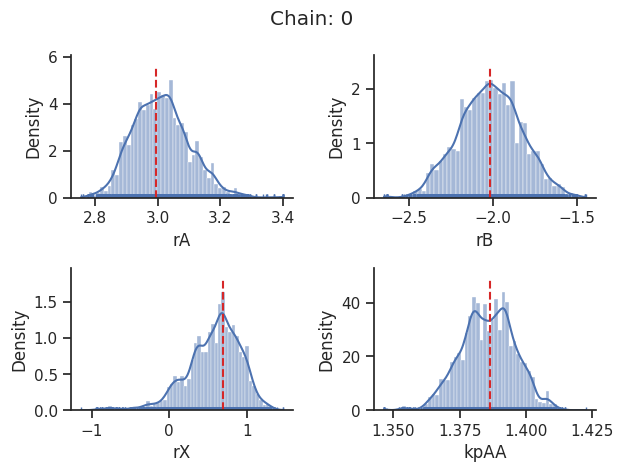

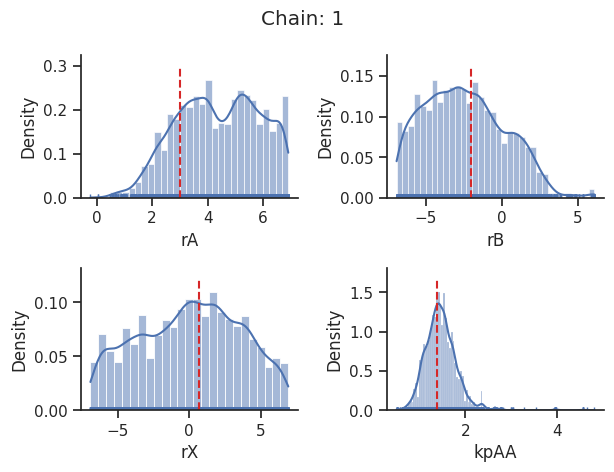

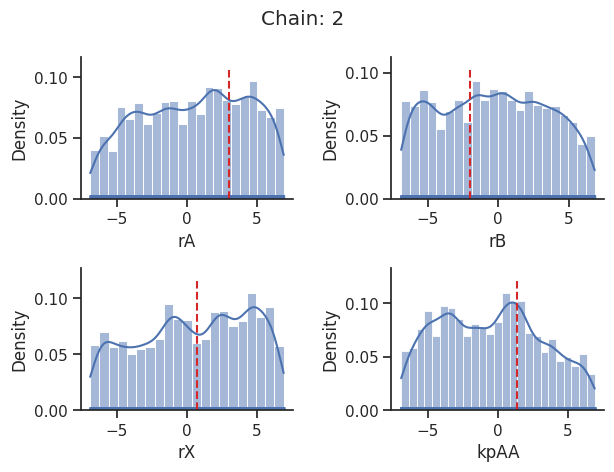

In [14]:
for i_chain in range(len(result.sample_result.betas)):
    ax = visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}"
    )
    
    y_max_00 = ax[0][0].get_ylim()[1]
    y_max_01 = ax[0][1].get_ylim()[1]
    y_max_10 = ax[1][0].get_ylim()[1]
    y_max_11 = ax[1][1].get_ylim()[1]
    
    ax[0][0].vlines(np.log(rA_true), 0, y_max_00, color="tab:red", linestyle="--")
    ax[0][1].vlines(np.log(rB_true), 0, y_max_01, color="tab:red", linestyle="--")
    ax[1][0].vlines(np.log(rX_true), 0, y_max_10, color="tab:red", linestyle="--")
    ax[1][1].vlines(np.log(kpAA_true), 0, y_max_11, color="tab:red", linestyle="--")

In [15]:
petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
# petab_problem.measurement_df


Engine will use up to 8 processes (= CPU count).
100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  5.80it/s]


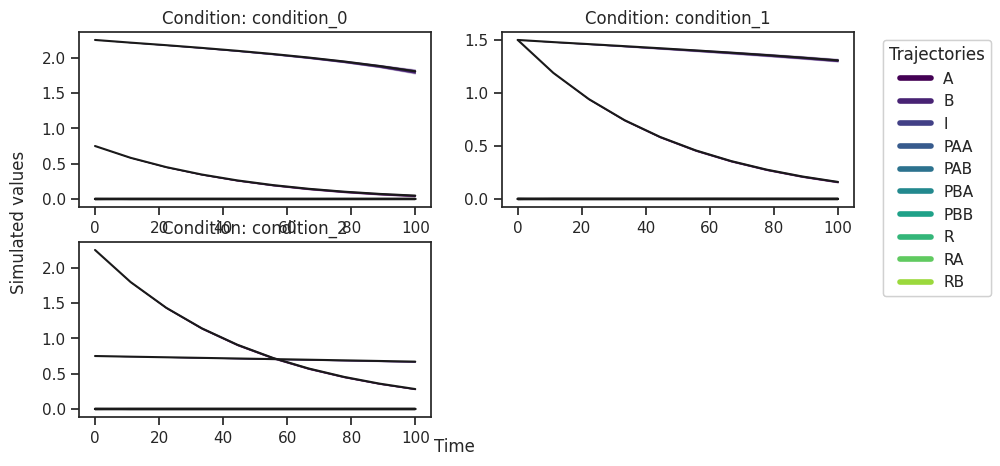

In [16]:
from pypesto.C import AMICI_STATUS, AMICI_T, AMICI_X, AMICI_Y
from pypesto.predict import AmiciPredictor


# This post_processor will transform the output of the simulation tool
# such that the output is compatible with the next steps.
def post_processor(amici_outputs, output_type, output_ids):
    outputs = [
        (
            amici_output[output_type]
            if amici_output[AMICI_STATUS] == 0
            else np.full((len(amici_output[AMICI_T]), len(output_ids)), np.nan)
        )
        for amici_output in amici_outputs
    ]
    return outputs


# Setup post-processors for both states and observables.
from functools import partial

amici_objective = result.problem.objective
state_ids = amici_objective.amici_model.getStateIds()
observable_ids = amici_objective.amici_model.getObservableIds()
post_processor_x = partial(
    post_processor,
    output_type=AMICI_X,
    output_ids=state_ids,
)
post_processor_y = partial(
    post_processor,
    output_type=AMICI_Y,
    output_ids=observable_ids,
)

# Create pyPESTO predictors for states and observables
predictor_x = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_x,
    output_ids=state_ids,
)
predictor_y = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_y,
    output_ids=observable_ids,
)

from pypesto.C import EnsembleType
from pypesto.ensemble import Ensemble

# corresponds to only the estimated parameters
x_names = result.problem.get_reduced_vector(result.problem.x_names)

# Create the ensemble with the MCMC chain from parallel tempering with the real temperature.
ensemble = Ensemble.from_sample(
    result,
    chain_slice=slice(
        None, None, 5
    ),  # Optional argument: only use every fifth vector in the chain.
    x_names=x_names,
    ensemble_type=EnsembleType.sample,
    lower_bound=result.problem.lb,
    upper_bound=result.problem.ub,
)

from pypesto.engine import MultiProcessEngine

engine = MultiProcessEngine()

ensemble_prediction = ensemble.predict(
    predictor_x, prediction_id=AMICI_X, engine=engine
)
from pypesto.C import CONDITION, OUTPUT

credibility_interval_levels = [90, 95, 99]

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(10, 5),
    axis_label_padding=60,
    groupby=CONDITION,
)

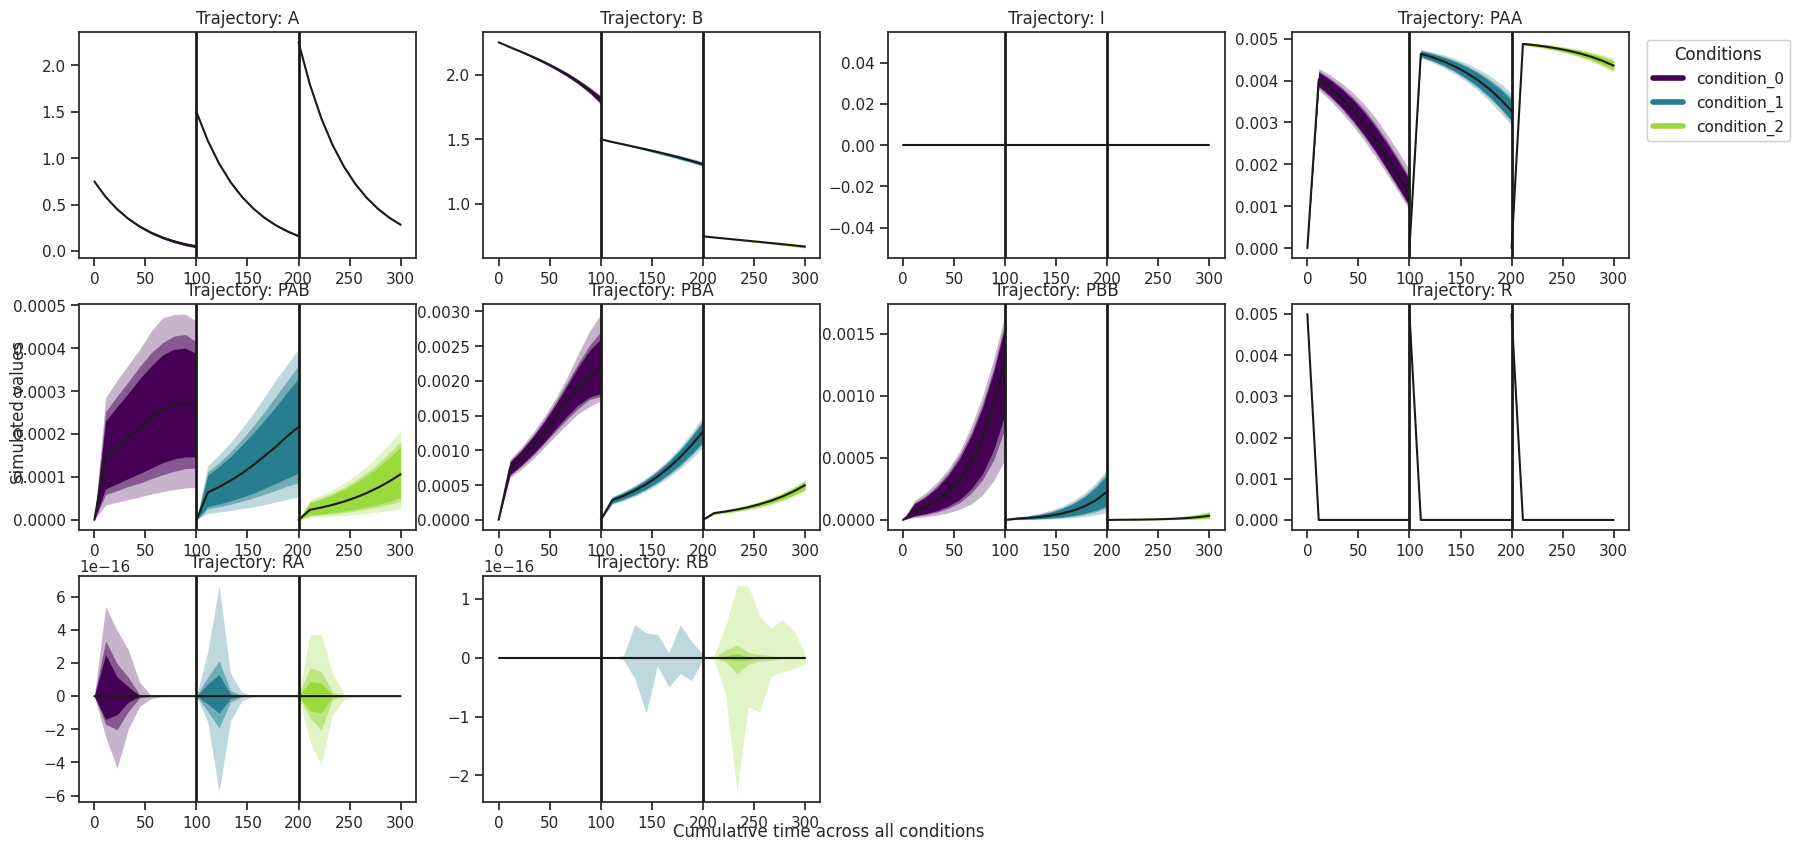

In [17]:
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(20, 10),
    axis_label_padding=60,
    groupby=OUTPUT,
)

In [18]:
mdf = petab_problem.measurement_df
# Create a custom objective with new output timepoints.
num_conditions=3
timepoints = [np.linspace(0, 200, 100) for i in range(num_conditions)]
amici_objective_custom = amici_objective.set_custom_timepoints(
    timepoints=timepoints
)

# Create an observable predictor with the custom objective.
predictor_y_custom = AmiciPredictor(
    amici_objective_custom,
    post_processor=post_processor_y,
    output_ids=observable_ids,
    condition_ids=[edata.id for edata in amici_objective_custom.edatas],
)

# Predict then plot.
ensemble_prediction = ensemble.predict(
    predictor_y_custom, prediction_id=AMICI_Y, engine=engine
)

100%|█████████████████████████████████████████████| 8/8 [00:02<00:00,  3.32it/s]


In [19]:
test_mdf = mdf.copy()
test_mdf = test_mdf[test_mdf['time']==0]
test_mdf['measurement'] = 2 * test_mdf['measurement']
# test_mdf.ignore_index = True
test_mdf

,observableId,simulationConditionId,time,measurement
0,obs_a,c_0,0.0,1.5
10,obs_b,c_0,0.0,4.5
20,obs_a,c_1,0.0,3.0
30,obs_b,c_1,0.0,3.0
40,obs_a,c_2,0.0,4.5
50,obs_b,c_2,0.0,1.5


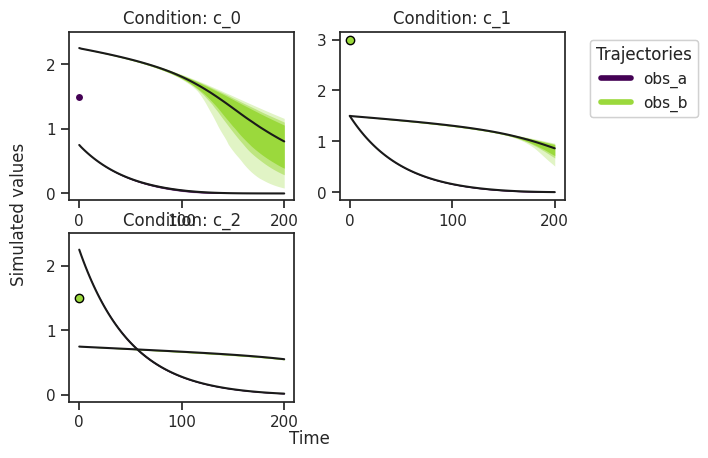

In [20]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    groupby=CONDITION,
    # groupby=OUTPUT,
    measurement_df=test_mdf,
    # axes=ax,
)
# plt.gcf().set_figheight(10)
# plt.gcf().set_figwidth(20)
# ax[0].legend()
# plt.tight_layout()

# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# ax[1][1].set_title('')
ax[0][0].set_ylim([-0.1, 2.5])
ax[1][0].set_ylim([-0.1, 2.5])
# ax[2].set_ylim([-0.1, 2.5])
# # fig.set_title('')
# ax[0].set_xlabel('Time (s)')
# ax[1].set_xlabel('Time (s)')
# ax[2].set_xlabel('Time (s)')
# ax[0].set_ylabel('Simulated Concentration (M)')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

plt.show()

In [21]:
print('hi')

hi


{'plot1': <Axes: xlabel='time', ylabel='values'>,
 'plot2': <Axes: xlabel='time', ylabel='values'>}

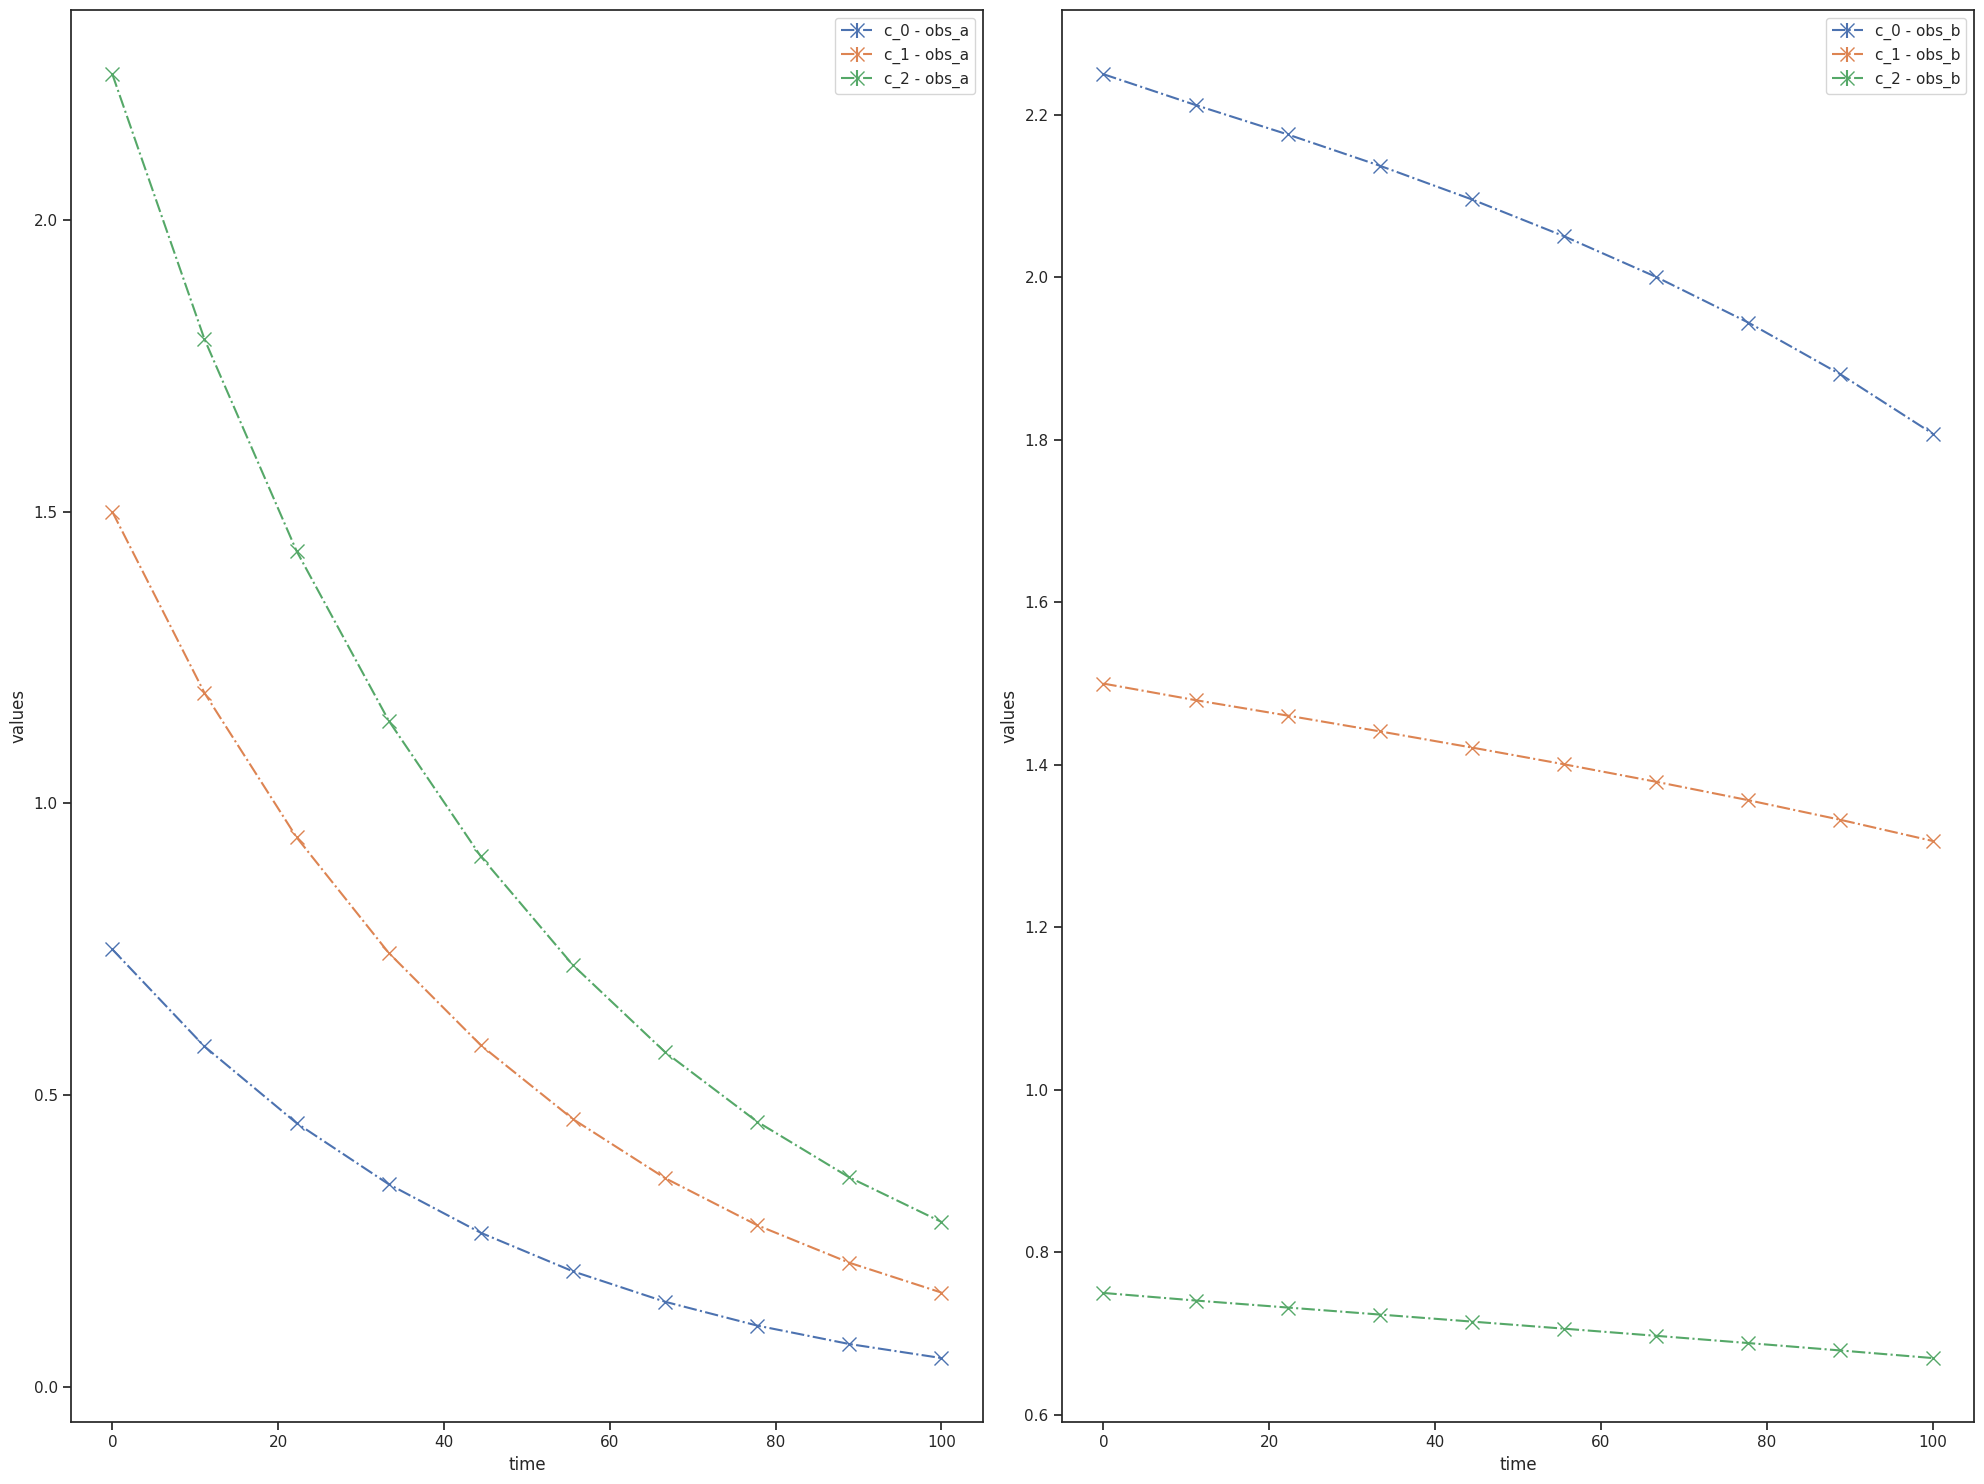

In [22]:
petab.v1.visualize.plot_problem(petab_problem, plotted_noise='MeanAndSEM')

In [23]:
petab.v1.visualize.plot_goodness_of_fit

<function petab.v1.visualize.plot_residuals.plot_goodness_of_fit(petab_problem: petab.v1.problem.Problem, simulations_df: str | pathlib.Path | pandas.core.frame.DataFrame, size: tuple = (10, 7), ax: matplotlib.axes._axes.Axes | None = None) -> matplotlib.axes._axes.Axes>

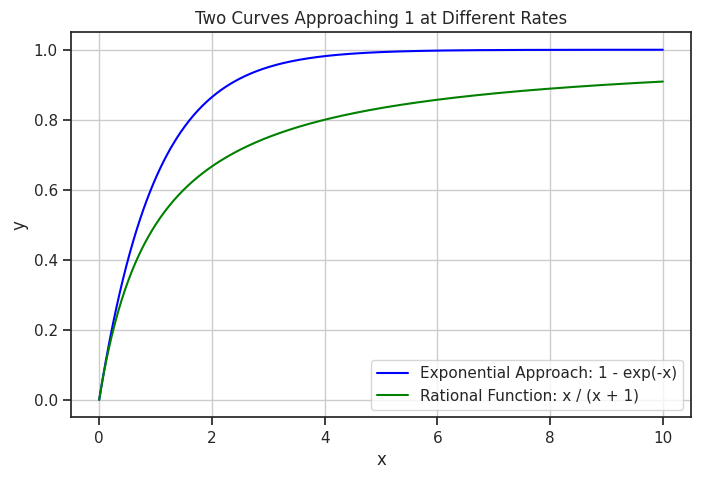

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 10, 500)

# Define two functions that approach 1 at different rates
y1 = 1 - np.exp(-x)  # Curve 1: Approaches 1 exponentially
y2 = x / (x + 1)     # Curve 2: Approaches 1 as a rational function

# Plot the curves
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label='Exponential Approach: 1 - exp(-x)', color='blue')
plt.plot(x, y2, label='Rational Function: x / (x + 1)', color='green')
plt.title('Two Curves Approaching 1 at Different Rates')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

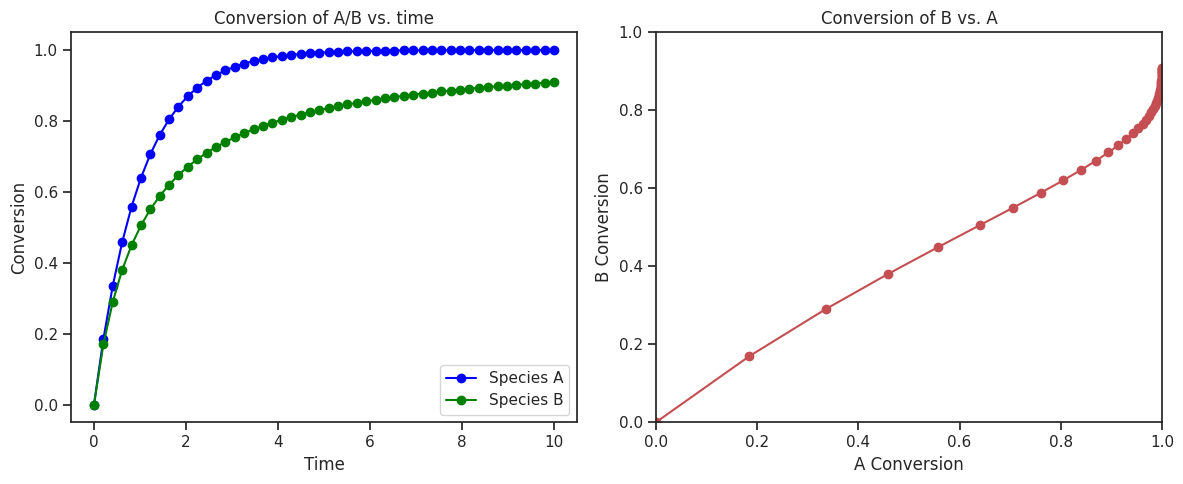

In [25]:
# Plotting the two curves side by side
plt.figure(figsize=(12, 5))

x = np.linspace(0, 10, 50)

# Define two functions that approach 1 at different rates
y1 = 1 - np.exp(-x)  # Curve 1: Approaches 1 exponentially
y2 = x / (x + 1)     # Curve 2: Approaches 1 as a rational function

# Plot 1: A and B vs x
plt.subplot(1, 2, 1)
plt.plot(x, y1, 'o-', label='Species A', color='blue')
plt.plot(x, y2, 'o-', label='Species B', color='green')
plt.title('Conversion of A/B vs. time')
plt.xlabel('Time')
plt.ylabel('Conversion')
plt.legend()
# plt.grid(True)

# Plot 2: A vs B
plt.subplot(1, 2, 2)
plt.plot(y1, y2, 'o-', label='Curve A vs. Curve B', color='r')
plt.title('Conversion of B vs. A')
plt.xlabel('A Conversion')
plt.ylabel('B Conversion')
plt.ylim(0, 1)
plt.xlim(0, 1)
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()